In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path=r"C:\Users\mulla\Documents\Nareshit\python_sessions\.ipynb_checkpoints\Visadataset-checkpoint.csv"
visa_df=pd.read_csv(file_path)


cat=visa_df.select_dtypes(include='object').columns
num=visa_df.select_dtypes(exclude='object').columns


In [17]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [18]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [19]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

- there are tot 25480 applicants are there

- in that 25480 applicabts ,17018 applicants got the visa

- 8462 appplicants did not get the visa

- also there are 16861 applicants are applied for visa from asia

- we want to know how many applivants from asia got certified

- and how many applicants from asia got denied

In [20]:
# 1:select  the conttinent data
# 2: continent data == 'asia' it is con1
# 3: select the case status data
# 4: case status data == 'Certified' in con2
# 5: con = con1&con2
# 6: apply main df on con get the len

In [21]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con=con1 & con2
len(visa_df[con])

11012

In [22]:
# from different continents how many ppl are certified

values=visa_df['continent'].unique()
for i in values:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con = con1 & con2
    print(len(visa_df[con]))

11012
397
2037
2957
493
122


In [23]:
# from different continents how many ppl are certified

values=visa_df['continent'].unique()
cert_count=[]
den_count=[]
for i in values:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']=='Certified'
    con3 = visa_df['case_status']=='Denied'
    cert_cou= con1 & con2
    den_cou= con1  & con3
    cert_count.append(len(visa_df[cert_cou]))
    den_count.append(len(visa_df[den_cou]))
    idx=values
pd.DataFrame(zip(cert_cou,den_cou),index=idx,columns=['Certified','Denied'])






ValueError: Length of values (25480) does not match length of index (6)

**cross tab**

In [9]:
#pd.crosstab(<index>,<columns>)
col1=visa_df['continent']
col2=visa_df['case_status']
pd.crosstab(col1,col2)

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [10]:
r1.plot()

NameError: name 'r1' is not defined

In [11]:
r1.plot(kind='bar')

NameError: name 'r1' is not defined

In [12]:
# pd.crosstab(<index>,<columns>)
col1=visa_df['continent']
col2=visa_df['case_status']
col3=visa_df['education_of_employee']
cols=[col1,col2]
pd.crosstab(col3,cols)

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

In [13]:
visa_df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [14]:
visa_df['prevailing_wage']
# wages are numerical values
# 25480 applicants are available
# different applicants having the  different wages



0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [15]:
list(visa_df.groupby('education_of_employee'))

[("Bachelor's",
           case_id      continent education_of_employee has_job_experience  \
  2         EZYV03           Asia            Bachelor's                  N   
  3         EZYV04           Asia            Bachelor's                  N   
  6         EZYV07           Asia            Bachelor's                  N   
  7         EZYV08  North America            Bachelor's                  Y   
  8         EZYV09           Asia            Bachelor's                  N   
  ...          ...            ...                   ...                ...   
  25466  EZYV25467         Europe            Bachelor's                  Y   
  25468  EZYV25469           Asia            Bachelor's                  N   
  25473  EZYV25474           Asia            Bachelor's                  Y   
  25475  EZYV25476           Asia            Bachelor's                  Y   
  25479  EZYV25480           Asia            Bachelor's                  Y   
  
        requires_job_training  no_of_employee

In [21]:
visa_df.groupby('education_of_employee').counts

AttributeError: 'DataFrameGroupBy' object has no attribute 'counts'

In [24]:
visa_df.groupby('education_of_employee').size()

education_of_employee
Bachelor's     10234
Doctorate       2192
High School     3420
Master's        9634
dtype: int64

In [25]:
# based on group by select an another column
visa_df.groupby('education_of_employee')['prevailing_wage']

In [26]:
visa_df['prevailing_wage'].mean()
# mean wage of all 24580 observation
# bachels,doctors,hs,master

np.float64(74455.81459209183)

In [31]:
visa_df[visa_df['education_of_employee']=="Bachelor's"]['prevailing_wage'].mean()

np.float64(73405.44373547)

In [27]:
visa_df.groupby('education_of_employee')['prevailing_wage'].mean()

education_of_employee
Bachelor's     73405.443735
Doctorate      64561.076657
High School    71582.147756
Master's       78843.057843
Name: prevailing_wage, dtype: float64

In [28]:
con=visa_df['case_status']=='Certified'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa             397
Asia             11012
Europe            2957
North America     2037
Oceania            122
South America      493
dtype: int64

In [29]:
con=visa_df['case_status']=='Denied'
new_df=visa_df[con]
new_df.groupby('continent').size()

continent
Africa            154
Asia             5849
Europe            775
North America    1255
Oceania            70
South America     359
dtype: int64

In [37]:
# i want to know min wage of asia people
visa_df['prevailing_wage'].min()
con=visa_df['continent']=='Asia'
new_df=visa_df[con]
new_df['prevailing_wage'].min()
#visa_df[visa_df['continent']=='Asia'['prevailing_wage'].min()

3.3188

In [30]:
visa_df.groupby('continent')['prevailing_wage'].min()

continent
Africa           32.9286
Asia              3.3188
Europe            9.1753
North America     2.1367
Oceania          24.4888
South America     3.0031
Name: prevailing_wage, dtype: float64

- we have seen **continent** and **c**continent**

- we have seen three variables **continent,case_status,and education of employee**

- we also done similar analysis  using group by

- only categorical column analysis completed

- only numerical analysis completed

- also bi variate and multivariate anlysis also completed

- now we need to perform two column analysis
    - this will give relation b/w two columns which are numerical in nature

    - so we can perform **corelation matrix** to get the relation

    - also we need to perform **scatter plots** to visulize the relation

**plt.scatter**

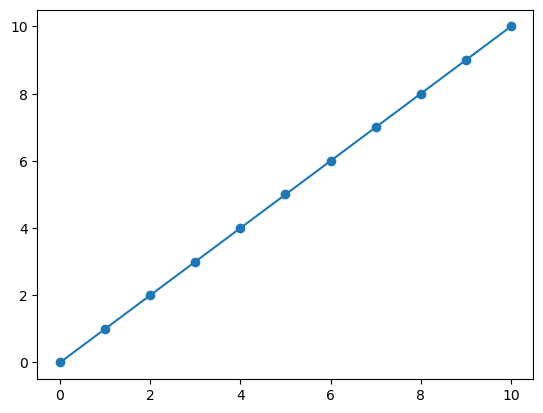

In [32]:
x=range(0,11)
y=range(0,11)
plt.scatter(x,y)
plt.plot(x,y)

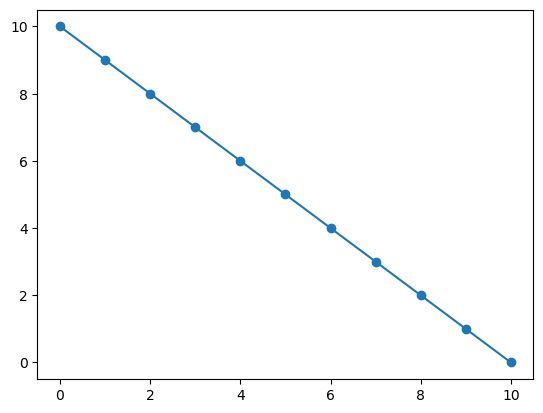

In [33]:
x=range(0,11) # 0 to 10
y=range(10,-1,-1) # 10 to -1+1=0
plt.scatter(x,y)
plt.plot(x,y)

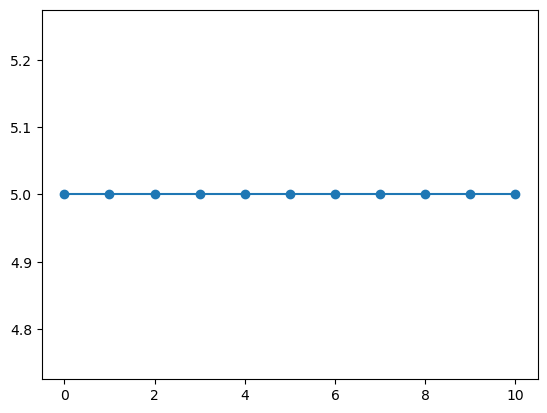

In [35]:
x=range(0,11)
y=[5 for i in range(0,11)]
plt.scatter(x,y)
plt.plot(x,y)

In [36]:
cat

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [37]:
num

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [38]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


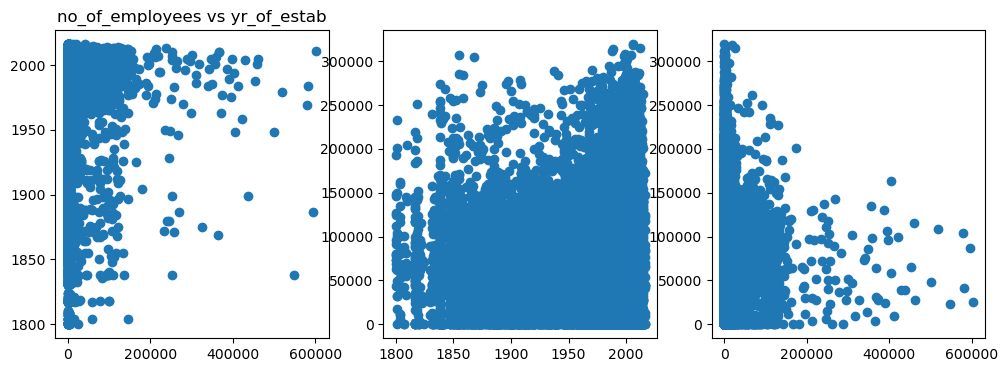

In [39]:
col1=visa_df['no_of_employees']
col2 = visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(12,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.title('no_of_employees vs yr_of_estab')
plt.subplot(1,3,2).scatter(col2,col3)
plt.subplot(1,3,3).scatter(col1,col3)

**heat map**

- any matrix values we can visualize using a heat amp

- haet map will provide colors for different values

- heat map also provide colors bar which indicates , the colors and it's values

- or ex the values eanges from 0.8 to 1 display as **blue color**

- so we no need to check values, we can directly see the blue color

- so immediately we can sense blue color is means highest values which is 0.8 to 1

In [40]:
visa_corr=visa_corr(numeric_only=True)
sns.heatmap(visa_corr,annot=True)

NameError: name 'visa_corr' is not defined

In [41]:
wine_data_corr=data_corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(wine_data_corr,annot=True)

NameError: name 'data_corr' is not defined

In [42]:
wine_data.columns

NameError: name 'wine_data' is not defined

In [43]:
col1=wine_data['free sulfer dioxide']
col2=wine_data['total sulfer dioxide']
col3=wine_data['fixed acidity']
col4=wine_data['ph']
col1=wine_data['citric acid']
plt.figure(figsize=(8,4))
plt.subplot(1,3,1).scatter(col1,col2)
plt.subplot(1,3,2).scatter(col3,col4)
plt.subplot(1,3,3).scatter(col1,col5)


NameError: name 'wine_data' is not defined